## Predict Customer Churn with Python and Machine Learning
In this project we will be building a model that Predicts customer churn with Machine Learning. We do this by implementing a predictive model with the help of python.
Prediction of Customer Churn means our beloved customers with the intention of leaving us in the future

#### Importing the libraries

In [3]:
import pandas as pd 
import numpy as np
import sklearn 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
%matplotlib inline

#### Importing the dataset

In [5]:
df = pd.read_csv("Data/churn.csv")

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [9]:
# To see all column names
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [11]:
# To check for NA or missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# To show some statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
# To get Customer Churn count
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

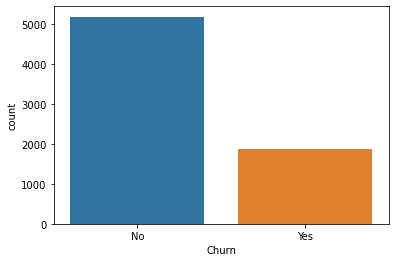

In [15]:
# Visualize the count of customer churn 
sns.countplot(df['Churn'])

In [16]:
# To see the percentage of customers that are leaving
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]
numRetained

5174

In [17]:
# print the percentage of customers that stayed
print(numRetained/(numRetained + numChurned) * 100,'% of customers stayed in the company')
# peint the percentage of customers that left
print(numChurned/(numRetained + numChurned) * 100, '% of customers left with the company')

73.4630129206304 % of customers stayed in the company
26.536987079369588 % of customers left with the company


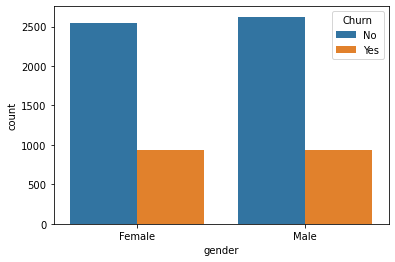

In [18]:
# Visualize the churn count for both males and females 
sns.countplot(x='gender', hue='Churn', data=df)

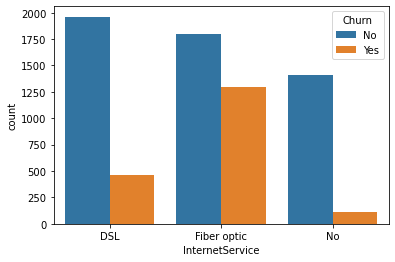

In [19]:
# Visualize the churn count for the internet service
sns.countplot(x='InternetService', hue='Churn', data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FACE453430>,
      dtype=object)

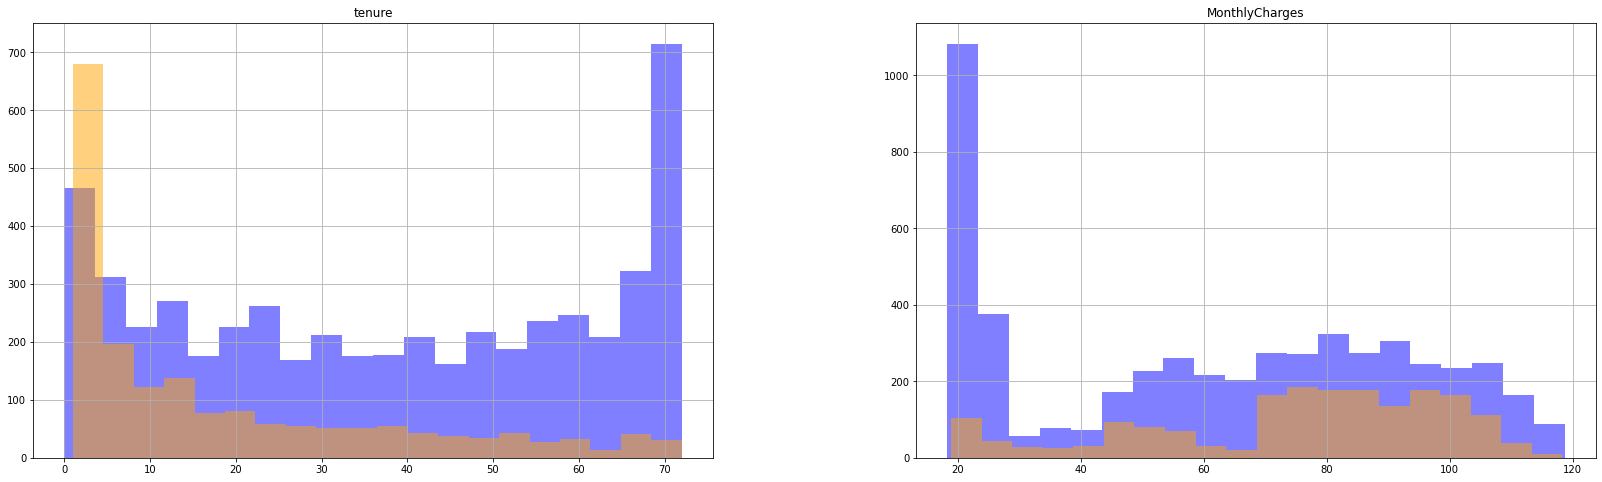

In [20]:
# To Visualize Numeric data
numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
df[df.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)

#### Clean dataset

In [21]:
# To remove unnecessary columns
cleanDF = df.drop('customerID', axis=1)

#### Convert all the non-numeric columns to numeric 

In [23]:
for column in cleanDF.columns:
  if cleanDF[column].dtype == np.number:
    continue
  cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])

<ipython-input-23-4fb794af8d2e>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleanDF[column].dtype == np.number:


In [24]:
cleanDF.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [25]:
cleanDF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


#### Feature Scaling

In [37]:
X = cleanDF.drop('Churn', axis=1)
y = cleanDF['Churn']
X = StandardScaler().fit_transform(X)

#### Splitting the dataset into the Training set and Test set

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
print(X_train)

[[-1.00955867 -0.43991649 -0.96662231 ...  1.33486261  0.00293498
  -1.40201791]
 [-1.00955867 -0.43991649 -0.96662231 ... -1.47405205  1.07811764
   0.56191289]
 [ 0.99053183 -0.43991649  1.03453023 ...  0.39855772 -1.37303293
  -0.69777743]
 ...
 [ 0.99053183 -0.43991649  1.03453023 ...  0.39855772 -1.44947559
  -0.31706396]
 [ 0.99053183  2.27315869 -0.96662231 ...  0.39855772  1.15289851
  -1.5290989 ]
 [ 0.99053183 -0.43991649 -0.96662231 ... -0.53774716 -1.49434411
   0.33475562]]


In [41]:
print(y_train)

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5634, dtype: int64


In [42]:
print(y_test)

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int64


#### Training the Logistic Regression model on the Training set

In [45]:
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Predicting a new result

In [47]:
predictions = model.predict(X_test)

# print the predictions
print(predictions)

[1 0 0 ... 0 0 0]


#### Predicting the Test set results

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



#### Making the Confusion Matrix